In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import pairwise

In [2]:
RNG = np.random.default_rng()

In [3]:
# number of samples to generate from
N = 1000

In [4]:
# normal distribution
# mean value
mu = 0.0
# standard deviation value
sigma = 0.1

# define probability density function
def PDF(x: float) -> float:
    return np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

# draw N values from the normal distribution
sample = RNG.normal(mu, sigma, N)

# verify the mean and the variance (should be close to 0.0)
print(abs(mu - np.mean(sample)))
print(abs(sigma - np.std(sample, ddof=1)))

0.0031002459387439885
0.002736631092437561


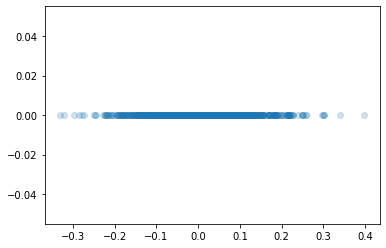

In [5]:
# plot the 1D data
plt.scatter(sample, np.zeros_like(sample), alpha=0.2)

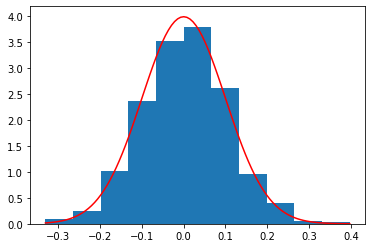

In [6]:
# calculate and plot a histogram (density=True so the result is PDF value at the bin)
bins = 11
hist, bin_edges = np.histogram(sample, bins, density=True)
bin_centers = [(right + left)*0.5 for left, right in pairwise(bin_edges)]
plt.bar(bin_centers, hist, width=(bin_edges[-1]-bin_edges[0])/bins)

# plot exact PDF on top of the histogram
pdf_xs = np.linspace(bin_edges[0], bin_edges[-1], 100)
pdf_ys = np.apply_along_axis(PDF, 0, pdf_xs)
plt.plot(pdf_xs, pdf_ys, color="red")